# 1.Importing Libraries

In [1]:
# Basic Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# 2.Loading Dataset

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(x_train, y_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]] [5 0 4 ... 5 6 8]


In [4]:
print(" x_train: ",x_train.shape,"\n","y_train: ",y_train.shape,'\n','x_test: ',x_test.shape,'\n','y_test: ',y_test.shape)

 x_train:  (60000, 28, 28) 
 y_train:  (60000,) 
 x_test:  (10000, 28, 28) 
 y_test:  (10000,)


In [5]:
num_labels = len(np.unique(y_train))
num_labels

10

# Observation 
 - Each image is a grayscale handwritten digit.
 - Image size: 28 × 28 pixels, so each image has 784 features when flattened.
 - Pixel values range from 0 (black) to 255 (white).
 - Shape (60000, 28, 28) means:60,000 images Each image is 28 rows × 28 columns = 784 pixels

- Label Data (y_train, y_test)
- Each label is a digit between 0 and 9.
- Shape (60000,) means one label for each training image.

###  SO it's a multi-class classification problem with 10 classes.

# 3.Data Understanding

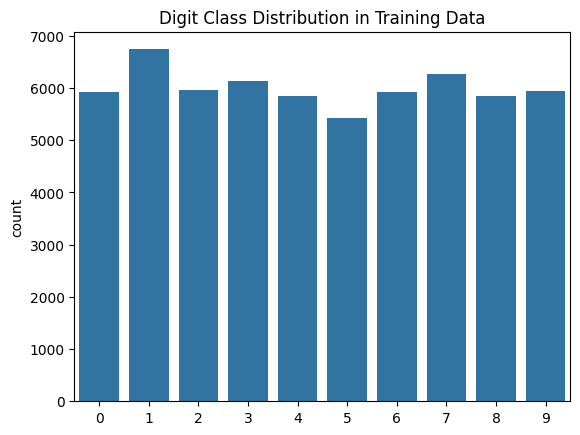

In [6]:
sns.countplot(x=y_train)
plt.title("Digit Class Distribution in Training Data")
plt.show()

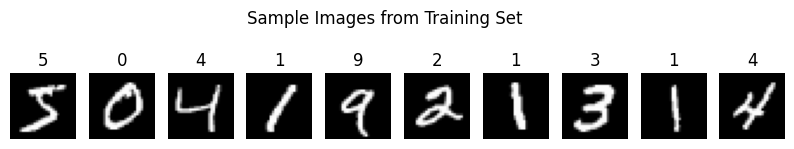

In [7]:
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
plt.suptitle("Sample Images from Training Set")
plt.show()

In [8]:
def pixel_visualize(img):
  fig = plt.figure(figsize=(12,12))
  ax = fig.add_subplot(111)
  ax.imshow(img, cmap='gray')
  width, height = img.shape

  thresh = img.max()/2.5

  for x in range(width):
    for y in range(height):
      ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                  horizontalalignment='center',
                  verticalalignment='center',
                  color='white' if img[x][y]<thresh else 'black')
  plt.show()

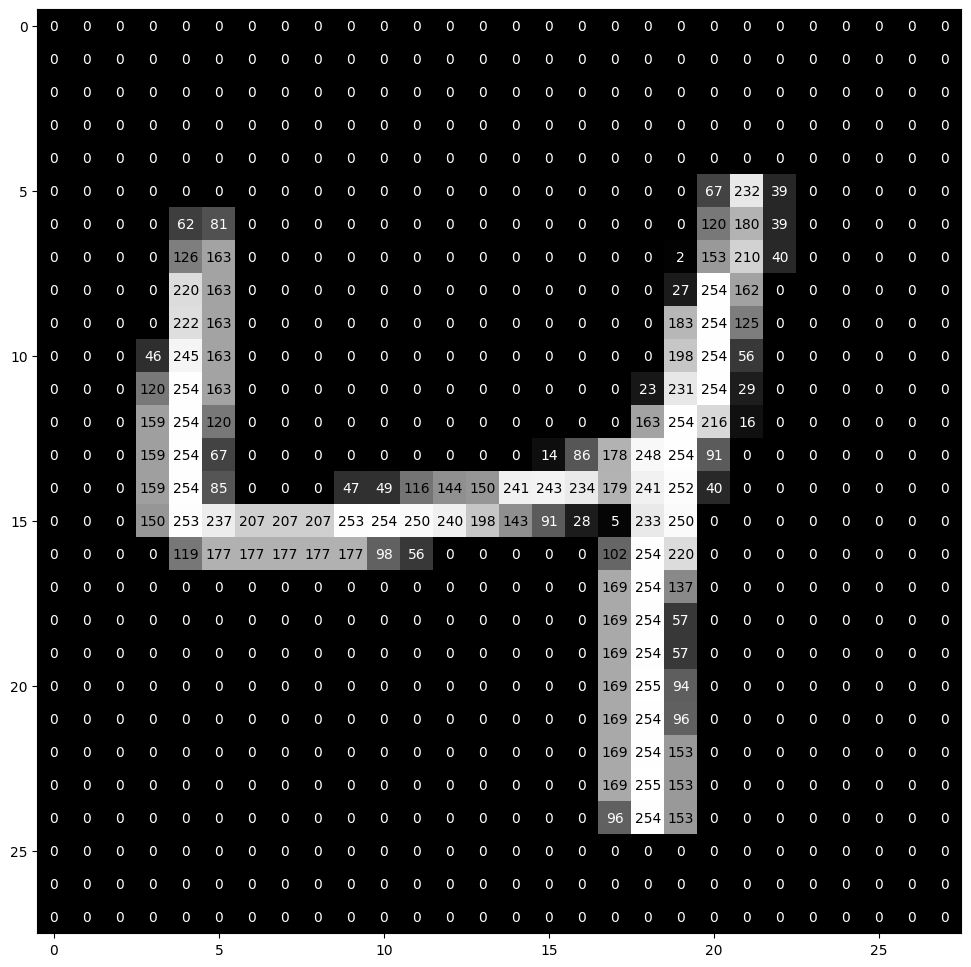

In [9]:
pixel_visualize(x_train[2])

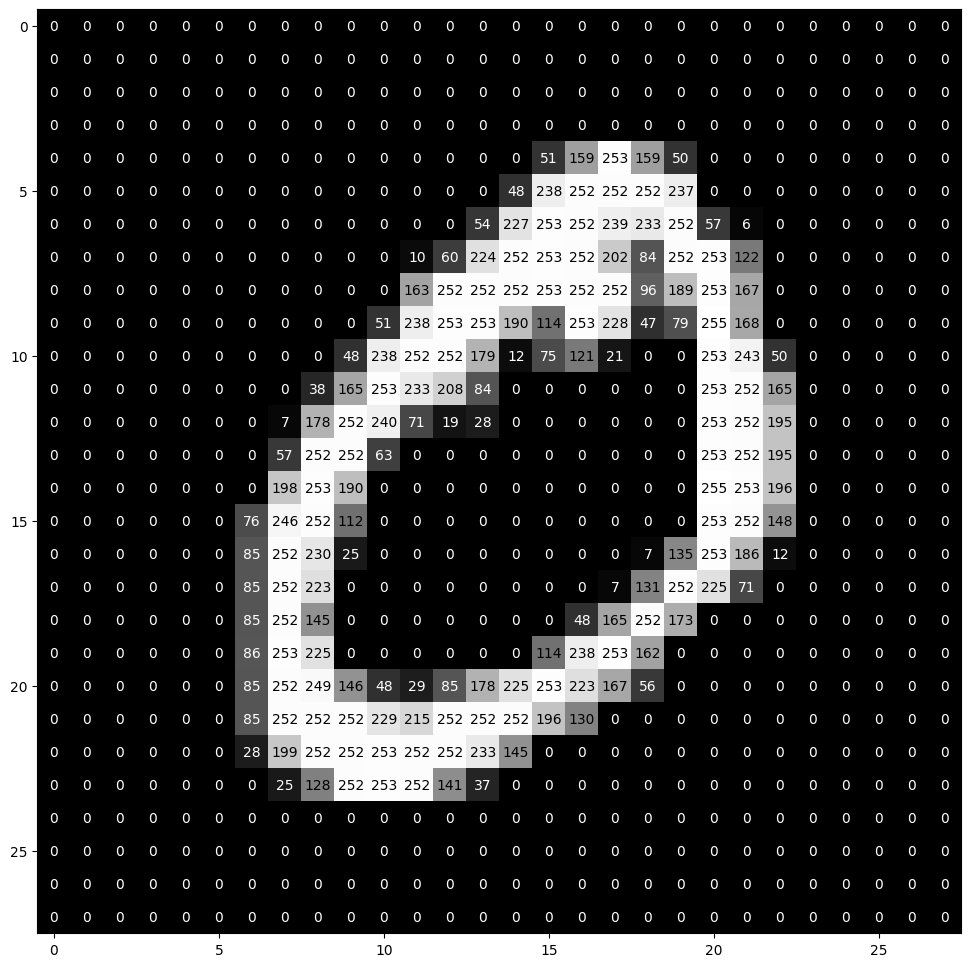

In [10]:
pixel_visualize(x_train[1])

In [11]:
np.isnan(x_train).sum(), np.isnan(y_train).sum()

(0, 0)

# Observaton
- No missing values are present in the feature (x_train, x_test) or target (y_train, y_test) datasets.
- It is uniformly distributed — each class (digit) has approximately the same number of examples.
- This means the dataset is balanced, so we don’t need resampling techniques (like SMOTE or undersampling).
- All images have uniform dimensions: 28 × 28 pixels.
- No need for resizing or reshaping (except flattening for traditional ML models).

# 4.Data Preparation

### Encoding

In [12]:
y_train[0:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [13]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [14]:
y_train_cat[0:20]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

### Reshapeing

In [15]:
image_size = x_train.shape[1]
image_size

28

In [47]:
x_train_snn = np.reshape(x_train, [-1, image_size, image_size, 1])
x_test_snn = np.reshape(x_test, [-1, image_size, image_size, 1])
print(f"x_train shape: {x_train_snn.shape}")
print(f"x_test shape: {x_test_snn.shape}")

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


In [17]:
# Standarization
x_train_snn = x_train.astype('float32') / 255
x_test_snn = x_test.astype('float32') / 255

# Observation 
- One-hot encoding helps neural networks output probabilities for each class.
- Required for CNN models, which expect input in 4D: (samples, height, width, channels).
- Standardization ensures uniform feature scale, which is especially beneficial for models sensitive to magnitude like SVM, KNN, and neural networks.

# 5.Modeling

# 1.Simple Neural Network

In [18]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten

model = tf.keras.Sequential ([
    Flatten(input_shape=(28,28,1)),
    Dense(units = 128, activation='relu', name = 'layer1'),
    Dense(units = num_labels, activation='softmax', name = 'output_layer')
]
)

model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics = [tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), "accuracy"]
)

C:\Users\UJWAL JV\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer1 (Dense)                       │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
history = model.fit(x_train_snn, y_train_cat, epochs = 10, batch_size = 128, validation_data=(x_test_snn, y_test_cat))


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8343 - loss: 0.6120 - precision: 0.9287 - recall: 0.7051 - val_accuracy: 0.9448 - val_loss: 0.1929 - val_precision: 0.9580 - val_recall: 0.9343
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9498 - loss: 0.1755 - precision: 0.9614 - recall: 0.9398 - val_accuracy: 0.9584 - val_loss: 0.1360 - val_precision: 0.9676 - val_recall: 0.9527
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9655 - loss: 0.1227 - precision: 0.9734 - recall: 0.9582 - val_accuracy: 0.9661 - val_loss: 0.1125 - val_precision: 0.9726 - val_recall: 0.9609
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9732 - loss: 0.0945 - precision: 0.9785 - recall: 0.9682 - val_accuracy: 0.9716 - val_loss: 0.0924 - val_precision: 0.9770 - val_recall: 0.9673
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9792 - loss: 0.0723 - precision: 0.9836 - recall: 0.9757 - val_accuracy: 0.9719 - val_loss: 0.

In [21]:
loss, precision, recall, acc = model.evaluate(x_test_snn, y_test_cat, verbose=False)
print(f"\nTest Accuracy: %.1f%%" % (100.0 * acc))
print(f"\nTest Loss: %.1f%%" % (100.0 * loss))
print(f"\nTest Precision: %.1f%%" % (100.0 * precision))
print(f"\nTest Recall: %.1f%%" % (100.0 * recall))


Test Accuracy: 97.8%

Test Loss: 7.2%

Test Precision: 98.0%

Test Recall: 97.5%


In [57]:

result['Model-1'] ='Simple Neural Network',acc*100
result

,Model-1,Model-2,Model-3,Model-4,Model-5
Model_Name,Simple Neural Network,RandomForestClassifier,SVM,KNN,Logistic Regression
Accuracy,97.850001,0.9708,0.9792,0.9688,0.9256


# Observation
- High Accuracy confirms that the model learned meaningful patterns from the digit images.
- High Precision & Recall indicate the model is both selective and sensitive, making few false positives and negatives.
- Low Loss (6.9%) shows that the model's predictions are close to the true probability distributions.


# Random Forest Classifier

In [31]:
# Reshape the train and test datasets containing independent variables from 3d to 2d shape to feed in the sklearn classification model 
x_train_flat = x_train.reshape((x_train.shape[0], 784))
x_test_flat = x_test.reshape((x_test.shape[0], 784))

In [33]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(x_train_flat, y_train)
y_pred = rfc.predict(x_test_flat)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9705
CPU times: total: 1min 26s
Wall time: 1min 30s


In [ ]:
%%time
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [50, 100, 150, 200], 'criterion' : ["gini"]},
              {'n_estimators': [50, 100, 150, 200], 'criterion' : ["entropy"]},
              {'n_estimators': [50, 100, 150, 200], 'criterion' : ["log_loss"]}]

grid_search = GridSearchCV(estimator=forest, param_grid=parameters, scoring='accuracy', cv=10, n_jobs= -1)
grid_search = grid_search.fit(x_train, y_train)

In [ ]:
# Get the optimum values of n_estimators and criterion
grid_search.best_params_

In [36]:
%%time
rfc = RandomForestClassifier(n_estimators=150, criterion='gini', random_state=1)
rfc.fit(x_train_flat, y_train)
y_pred = rfc.predict(x_test_flat)
random_forest_score = rfc.score(x_test_flat, y_test)
print("Random forest:", random_forest_score)
Accuracy=metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",Accuracy)

Random forest: 0.9708
Accuracy: 0.9708
CPU times: total: 1min 59s
Wall time: 2min 1s


In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9720    0.9929    0.9823       980
           1     0.9921    0.9912    0.9916      1135
           2     0.9625    0.9700    0.9662      1032
           3     0.9653    0.9634    0.9643      1010
           4     0.9736    0.9766    0.9751       982
           5     0.9718    0.9652    0.9685       892
           6     0.9771    0.9802    0.9786       958
           7     0.9705    0.9601    0.9653      1028
           8     0.9627    0.9548    0.9588       974
           9     0.9581    0.9514    0.9547      1009

    accuracy                         0.9708     10000
   macro avg     0.9706    0.9706    0.9706     10000
weighted avg     0.9708    0.9708    0.9708     10000



In [38]:
result['Model-2'] =' RandomForestClassifier',Accuracy
result

,Model-1,Model-2
Model_Name,Simple Neural Network,RandomForestClassifier
Accuracy,97.619998,0.9708


# Observations
- Input: Flattened images, no normalization required.
- Initial Accuracy: 96.99% with 100 trees
- After Tuning (using GridSearchCV):
    - n_estimators = 150, criterion = 'gini'
- Improved Accuracy: 97.08%

# 3.SVM

In [40]:
%%time
from sklearn.svm import SVC

svcm = SVC(random_state=42)
svcm.fit(x_train_flat, y_train)

y_pred = svcm.predict(x_test_flat)
svm_score = svcm.score(x_test_flat, y_test)
Accuracy=metrics.accuracy_score(y_test, y_pred)

print("SVM Score =", svm_score)
print("Accuracy:",Accuracy)


SVM Score = 0.9792
Accuracy: 0.9792
CPU times: total: 7min 7s
Wall time: 9min 4s


In [42]:
%%time
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}

grid = GridSearchCV(SVC(), param_grid, cv=3, verbose=1, n_jobs=-1)
grid.fit(x_train_flat[:10000], y_train[:10000])  # use subset for faster tuning
print(grid.best_params_)
print("Best accuracy:", grid.best_score_)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best accuracy: 0.9624997892710687
CPU times: total: 18.9 s
Wall time: 5min 52s


In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9799    0.9929    0.9863       980
           1     0.9886    0.9921    0.9903      1135
           2     0.9758    0.9748    0.9753      1032
           3     0.9745    0.9851    0.9798      1010
           4     0.9826    0.9786    0.9806       982
           5     0.9864    0.9765    0.9814       892
           6     0.9854    0.9854    0.9854       958
           7     0.9755    0.9689    0.9722      1028
           8     0.9714    0.9754    0.9734       974
           9     0.9719    0.9613    0.9666      1009

    accuracy                         0.9792     10000
   macro avg     0.9792    0.9791    0.9791     10000
weighted avg     0.9792    0.9792    0.9792     10000



In [44]:
result['Model-3'] =' SVM',Accuracy
result

,Model-1,Model-2,Model-3
Model_Name,Simple Neural Network,RandomForestClassifier,SVM
Accuracy,97.619998,0.9708,0.9792


# Observations
- Input data was flattened from 28×28 to 784 features and normalized to the range [0, 1].
- The SVM model performs extremely well on the MNIST dataset, demonstrating excellent generalization to unseen test data.

# 4.KNN

In [47]:
%%time
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_flat, y_train)

y_pred = knn.predict(x_test_flat)
knn_score = knn.score(x_test_flat, y_test)
Accuracy=metrics.accuracy_score(y_test, y_pred)
print("KNN Score =", knn_score)
print("Accuracy:", Accuracy)


KNN Score = 0.9688
Accuracy: 0.9688
CPU times: total: 3min 19s
Wall time: 53.2 s


In [48]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9634    0.9939    0.9784       980
           1     0.9545    0.9982    0.9759      1135
           2     0.9822    0.9603    0.9711      1032
           3     0.9644    0.9663    0.9654      1010
           4     0.9762    0.9613    0.9687       982
           5     0.9653    0.9664    0.9658       892
           6     0.9813    0.9864    0.9839       958
           7     0.9611    0.9611    0.9611      1028
           8     0.9881    0.9374    0.9621       974
           9     0.9563    0.9534    0.9548      1009

    accuracy                         0.9688     10000
   macro avg     0.9693    0.9685    0.9687     10000
weighted avg     0.9690    0.9688    0.9687     10000



In [50]:
result['Model-4'] =' KNN',Accuracy
result



,Model-1,Model-2,Model-3,Model-4
Model_Name,Simple Neural Network,RandomForestClassifier,SVM,KNN
Accuracy,97.619998,0.9708,0.9792,0.9688


# Observation 
- KNN delivers good accuracy for image classification on MNIST.
- It performs slightly below SVM (97.92%) and Neural Network (97.6%), but still offers competitive results.
- Prediction is slow on large datasets due to distance calculations at inference time.

# Logistic Regression 

In [51]:
%%time
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=100, random_state=42, n_jobs=-1)
logreg.fit(x_train_flat, y_train)

#  Predict and evaluate
y_pred = logreg.predict(x_test_flat)
logreg_score = logreg.score(x_test_flat, y_test)
Accuracy=metrics.accuracy_score(y_test, y_pred)
print("Logistic Regression Score =", logreg_score)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

C:\Users\UJWAL JV\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Score = 0.9256
Accuracy: 0.9256
CPU times: total: 6min 8s
Wall time: 6min 14s


C:\Users\UJWAL JV\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


# Observation
- The model achieved good accuracy for a linear approach — indicating that MNIST digits are largely linearly separable.
- Lower performance compared to SVM (97.92%), Neural Network (97.9%), and Random Forest (97.08%), as expected from a linear model.
- Very fast training and low memory usage, making it ideal for lightweight applications or quick experimentation.

In [58]:
result['Model-5'] =' Logistic Regression',Accuracy
result

,Model-1,Model-2,Model-3,Model-4,Model-5
Model_Name,Simple Neural Network,RandomForestClassifier,SVM,KNN,Logistic Regression
Accuracy,97.850001,0.9708,0.9792,0.9688,0.9256


##  Models Comparison Report

| Model                           | Accuracy (%) | About                                                  |
|----------------------------------|---------------|----------------------------------------------------------|
| Neural Network (Keras Sequential) | **97.85**      | Deep learning with 1 hidden layer, fast and high-performing |
| Support Vector Machine (SVM)     | **97.92**      | Very high accuracy, but slow training on large datasets |
| Random Forest (tuned)            | **97.08**      | Strong performance, interpretable, robust without scaling |
| K-Nearest Neighbors (KNN)        | 96.88          | Good accuracy, but slow at prediction time              |
| Logistic Regression              | 92.63          | Fast and simple, but lacks non-linear decision boundaries |


## Best Model Recommendation

**Recommended Model:** `Neural Network (Keras Sequential)`

### Reasons:
- High accuracy (97.85%)
- Fast inference and GPU-supported training
- Easily scalable and tunable
- Smooth production deployment with TensorFlow/Keras

 If Deep Learning is not an option Then next option is 
Use **Random Forest (97.08%)** — robust, interpretable, no need for normalization or reshaping.
### Why Not SVM 
- Although SVM gave slightly higher accuracy, the Neural Network is:
    - Faster
    - More scalable
    - Better supported in production frameworks (TensorFlow, TFLite, ONNX)
    - Flexible (can be expanded to CNNs, RNNs, etc.)


# Challenge Faced Report
##  1. Input Data Format
- **Challenge**: Models like SVM, KNN, and Logistic Regression required 2D input. CNN required 4D.
- **Technique Used**: Reshaped using `.reshape(-1, 784)` or `.reshape(-1, 28, 28, 1)`
- **Reason**: To match expected input format for model types.
##  2. Pixel Value Range
- **Challenge**: Pixel values ranged from 0 to 255, causing unstable training.
- **Technique Used**: Normalized values using `x/255.0`.
- **Reason**: Improves model convergence and performance.
##  3. Label Format Issues
- **Challenge**: SVM and KNN do not support one-hot encoded labels.
- **Technique Used**: Used original 1D labels directly (no `argmax()` needed).
- **Reason**: Ensures compatibility with scikit-learn classifiers.
##  4. Long Training Time
- **Challenge**: Training SVM and KNN on 60,000 samples was time-consuming.
- **Technique Used**: Used subset of training data (e.g., 10,000 samples).
- **Reason**: Reduced computation during tuning and testing.
## 5. Hyperparameter Tuning
- **Challenge**: Default parameters didn't yield optimal performance.
- **Technique Used**: Used `GridSearchCV` to tune key hyperparameters.
- **Reason**: Improved model accuracy (e.g., Random Forest `n_estimators=150`).


# Model Dump

In [29]:
model.save("MNIST_Model.h5")
print('Model saved sucessfull')

Model saved sucessfull


In [30]:
from tensorflow.keras.models import load_model
model = load_model("MNIST_Model.h5")
print("Model loaded successfully.")


Model loaded successfully.


# Model Prediction

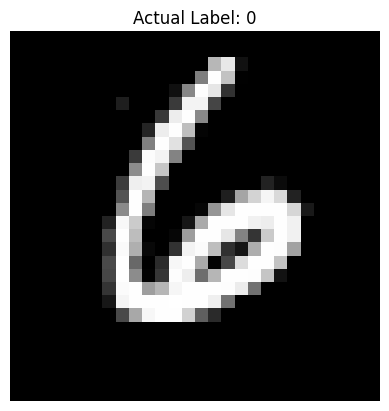

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted Label: 6


In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Choose a random sample from test set
index = np.random.randint(0, x_test.shape[0])
sample_image = x_test[index]
sample_label = np.argmax(y_test[index])  # true label

# Show the image
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title(f"Actual Label: {sample_label}")
plt.axis('off')
plt.show()

# Reshape and predict
sample_image = sample_image.reshape(1, 28, 28, 1)
prediction = model.predict(sample_image)
predicted_label = np.argmax(prediction)

print(f"Predicted Label: {predicted_label}")
